## Analysis 02: Comparing Sentiments in Different Cities and Countries

##### GETTING THE DATA

In [49]:
import pandas as pd

data2 = pd.read_csv(r'C:\Users\Raheyma Arshad\Desktop\Sentimentalized Tweets.csv')
del data2['Unnamed: 0']
data2 = data2.dropna(subset=['location']).reset_index(drop=True)

##### GETTING THE COUNTRY OF EACH TWEET

In [64]:
from geopy.geocoders import Nominatim

def get_country(x):       
    geolocator = Nominatim(user_agent = "geoapiExercises")
    location = geolocator.geocode(x)
    return str(location).rsplit(', ')[-1]

locations = data2['location'].unique().tolist()
countries = []

for location in locations:
    try:
        countries.append(get_country(location))
    except:
        countries.append('Country Not Recognized')
        
dict_1 = dict(zip(locations, countries))
data2['Country'] = data2['location'].map(dict_1)
data2['Country'] = data2['Country'].apply(lambda x: x.replace('United States of America', 'United States'))
data2 = data2[data2.Country != 'None']
data2 = data2[data2.Country != 'Country Not recognized']

##### SEPARATING COUNTRIES WITH MORE THAN 100 POSITIVE/NEGATIVE/NEUTRAL TWEETS

In [137]:
# Putting the country names in a list
labels = data2['Country'].unique().tolist()

# Creating lists for counts of Positive, Negative and Neutral tweets for each country and keeping them in dataframes
positives = []
senti_pos = []
for label in labels:
    country_tweets = data2[data2.Country == label]
    country_positive = country_tweets[country_tweets['Predicted Sentiment'] == 'Positive']
    positives.append(len(country_positive))
    senti_pos.append('Positive')
df_positive = pd.DataFrame({'Country': labels, 'Count of Tweets': positives, 'Sentiment': senti_pos})

negatives = []
senti_neg = []
for label in labels:
    country_tweets = data2[data2.Country == label]
    country_negative = country_tweets[country_tweets['Predicted Sentiment'] == 'Negative']
    negatives.append(len(country_negative))
    senti_neg.append('Negative')
df_negative = pd.DataFrame({'Country': labels, 'Count of Tweets': negatives, 'Sentiment': senti_neg})
    
neutrals = []
senti_neu = []
for label in labels:
    country_tweets = data2[data2.Country == label]
    country_neutral = country_tweets[country_tweets['Predicted Sentiment'] == 'Neutral']
    neutrals.append(len(country_neutral))
    senti_neu.append('Neutral')
df_neutral = pd.DataFrame({'Country': labels, 'Count of Tweets': neutrals, 'Sentiment': senti_neu})

# Joining the dataframes of Positive, Negative and Neutral Tweets 
frames = [df_positive, df_negative, df_neutral]
df = pd.concat(frames)

# Taking countries with more than 100 tweets in the dataset
df_high_counts = df[df['Count of Tweets'] > 100]

##### CREATING A GROUPED BAR PLOT 

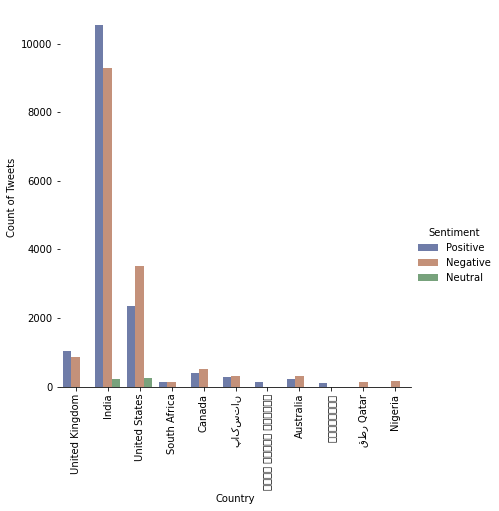

In [139]:
import seaborn as sns
g = sns.catplot(data=df_high_counts, kind = "bar", x = "Country", y = "Count of Tweets", hue="Sentiment", ci="sd", 
                palette="dark", alpha=.6, height=6)

g.despine(left=True)
g.set_axis_labels("Country", "Count of Tweets")
g.set_xticklabels(rotation=90)